# White_Wine_Quality

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [5]:
# Datset = pd.read_csv("datasets\Diabetic_Retinopathy\messidor_features.arff") 
Datset = pd.read_csv('/Users/annikatimermanis/Desktop/project/Regression/Regression_Datasets/1_Wine_Quality/Wine_Quality_White.csv', delimiter=';') 


In [6]:
df = pd.DataFrame(Datset)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Prepration And Analysis

In [7]:
print(np.count_nonzero(Datset==np.nan))

0


In [8]:
frequency = df['quality'].value_counts()
print(frequency)
print("---------------------------")

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
---------------------------


In [9]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distribution")
# plt.show()

In [21]:
# sns.pairplot(df, hue="Class")
# print("ok")

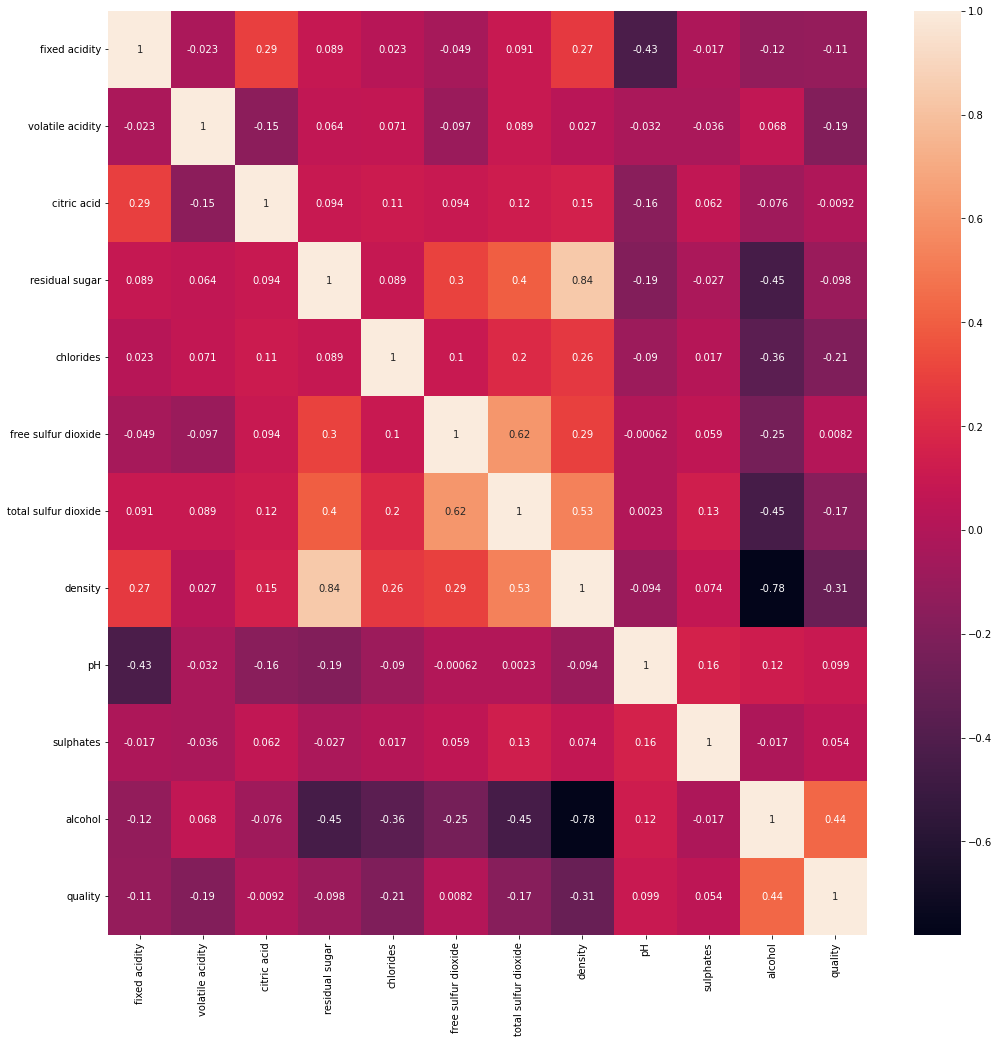

In [10]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot =True);

## Train and Test set

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y_train = y_train.to_numpy().reshape(-1)

In [13]:
StScale = StandardScaler()
X_test = StScale.fit_transform(X_test)
X_train = StScale.fit_transform(X_train)

## Linear Regression

In [14]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

## Linear Regression Analysis

In [15]:
linear_r_predict = linear_r.predict(X_test)

In [16]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, linear_r_predict))
print(explained_variance_score(y_test, linear_r_predict))
print(r2_score(y_test, linear_r_predict))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

0.6604676020989187
0.2562981823484345
0.25064167866056086


## Support Vector Regression

In [17]:
svr = SVR()

In [18]:
parameters = {
    'C': scipy.stats.uniform(1, 1000), 
    'gamma': scipy.stats.uniform(0.01, 1000)
#     'Kernel': ['rbf', 'poly', 'sigmoid']
#     'degree':[2,3,4,5,6]
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=5, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'C': 964.6627605010293, 'gamma': 383.45151882577767}

In [19]:
svr_model.best_estimator_

SVR(C=964.6627605010293, gamma=383.45151882577767)

## Support Vector Regression Analysis

In [99]:
svr_predictions = svr_model.predict(X_test)

In [20]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, svr_predictions))
print(explained_variance_score(y_test, svr_predictions))
print(r2_score(y_test, svr_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

NameError: name 'svr_predictions' is not defined

## Decision Tree Regression

In [22]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## Decision tree Analysis

In [23]:
tree_predictions = tree.predict(X_test)

In [24]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, tree_predictions))
print(explained_variance_score(y_test, tree_predictions))
print(r2_score(y_test, tree_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

0.8816326530612245
0.012984435452907173
-0.0002894356005791465


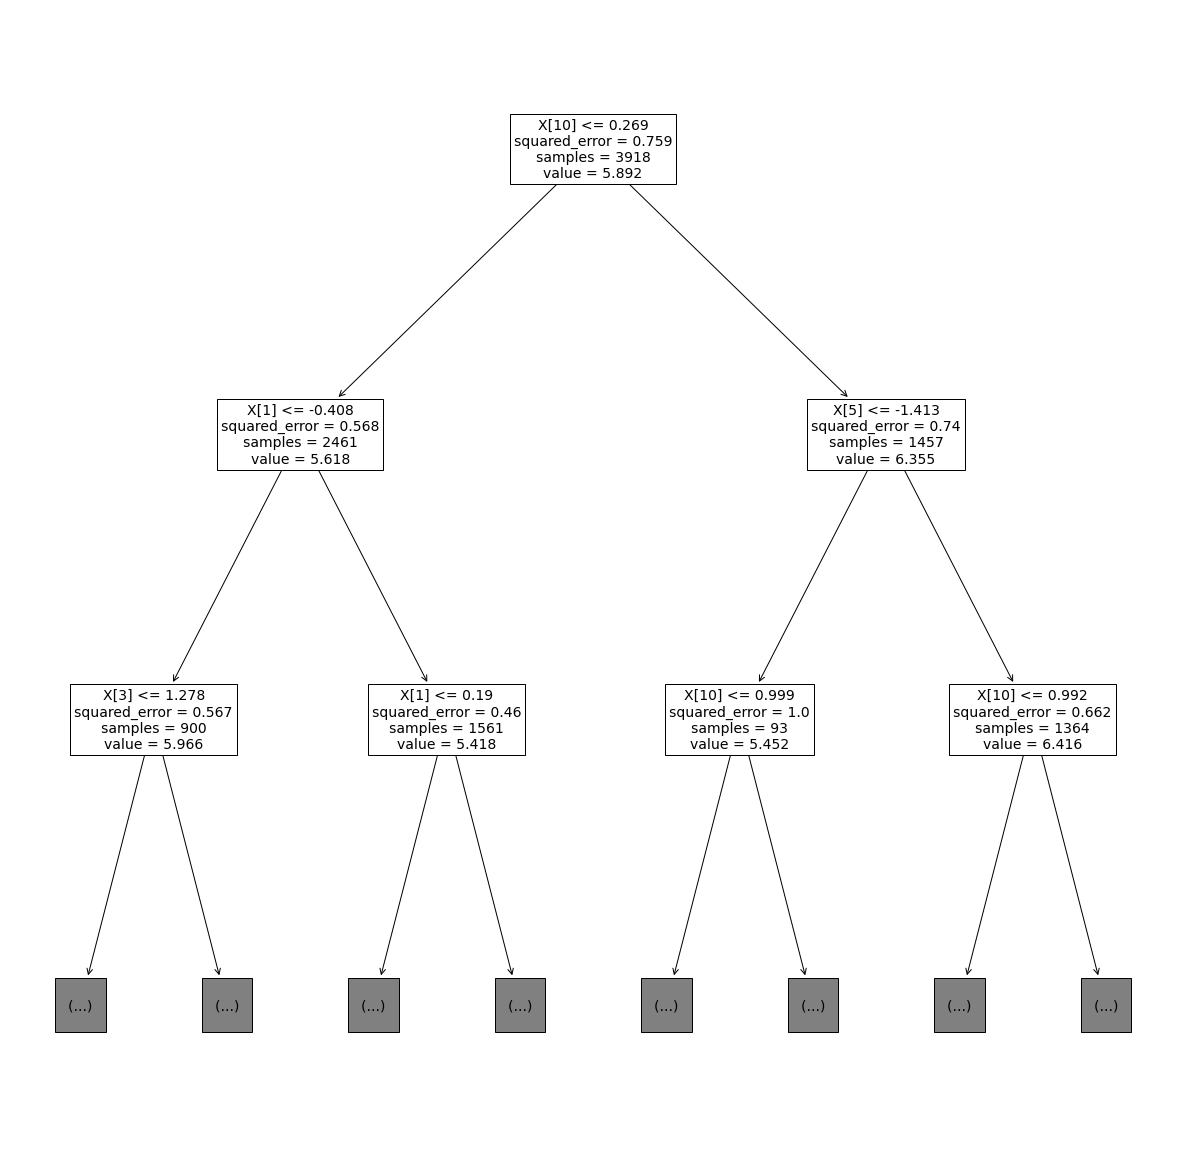

In [25]:
plt.figure(figsize=(21,21))
plot_tree(tree, max_depth = 2, fontsize=14);

## Random Forest Regression

In [26]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

## Random Forest Analysis

In [27]:
forest_predictions = forest.predict(X_test)

In [28]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, forest_predictions))
print(explained_variance_score(y_test, forest_predictions))
print(r2_score(y_test, forest_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

0.4985345918367347
0.44433539147641676
0.43436885672937753


## K Nearest Neighbours Regression

In [50]:
# knn = KNeighborsClassifier()

In [85]:
# parameters = {
#     'n_neighbors': range(1, 100), 
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
#     'weights': ['uniform', 'distance'], 
#     'leaf_size': scipy.stats.uniform(1, 50)
# }
# knn_model = RandomizedSearchCV(knn, parameters,verbose=10,random_state=0).fit(X_train, y_train)
# knn_model.best_params_

In [56]:
# knn_model.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=41.60843643877466,
                     n_neighbors=47)

## KNN Analysis

In [57]:
knn_predictions = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       101
           1       0.78      0.48      0.60       130

    accuracy                           0.63       231
   macro avg       0.67      0.65      0.63       231
weighted avg       0.68      0.63      0.63       231

[[83 18]
 [67 63]]
0.6320346320346321
0.6252257337773095
0.6292554898887861


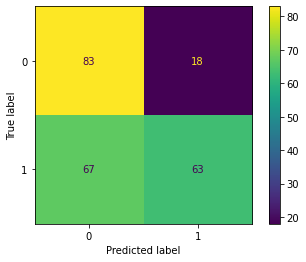

In [59]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix (y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))
print(f1_score(y_test, knn_predictions, average='weighted'))
print(f1_score(y_test, knn_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions);